## **University of Tehran**
### Python Code Project
## **Name:** Armin Hassanzadeh Hassanabad  
## **Supervisor:** Dr. Amir Reza Tajaly

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
heart = pd.read_csv('G:/University of Tehran/08 Python Amir Tajally/Heart data.csv')
heart

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,52,1,4,140.0,266.0,0.0,0.0,134.0,1.0,2.0,2.0,NaN,NaN,1
593,43,1,4,140.0,288.0,0.0,0.0,135.0,1.0,2.0,2.0,NaN,NaN,1
594,41,1,4,120.0,336.0,0.0,0.0,118.0,1.0,3.0,2.0,NaN,NaN,1
595,44,1,4,135.0,491.0,0.0,0.0,135.0,0.0,0.0,NaN,NaN,NaN,1


In [224]:
from summarytools import dfSummary
dfSummary(heart)

2025-04-07 23:01:39,500 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-07 23:01:39,502 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-07 23:01:39,550 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-07 23:01:39,551 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-07 23:01:39,725 - INFO     - Using categorical units to plot a list of strings that 

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Age (age in year)[int64],Mean (sd) : 51.2 (9.1)min < med < max:28.0 < 52.0 < 77.0IQR (CV) : 14.0 (5.6),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAqZJREFUeJzt3T+O2kAUgPE3YSEGIgNCgo6WIlIKSg6Rw+YIKTjAihvQIQEywsHBGKeIEhGJsPjfet7w/XovU3wChvUbmzRNBbDdh7oXADzipe4FuMgY0xaRVs7LT2maHstcjwsItWTGmPZwOPzq+/4gz/X7/X5njPlGrP8i1PK1fN8fzOfzY6/Xi7JcGASBt1gsBpvNpiUihHqFUCvS6/Wi0Wj0I8el7dIX4wA2U1CBUKECH/3/UWDn7l8ul2bZ63l2hHpDkZ17HMdekiSfoyj6LiJ5vqPiBkK9LffOfbVaDZbLZed8PjeqWtwzItQ78uzcd7sdu/YKsJmCCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWc/Rdqwbkl7oCyjJOhFp1bqvMOqCRJmiLiG2Py/gknhwOdDFUK3P0kUt8dUGEYNuM4/jKZTBqNRiPzukXcHQ50NVQRyT+3VNcdUKfT6cXzvM5sNovG4/Eu6/UuDwc6HapW3W4372CgiKPDgez6oQKhQgVChQqEChUIFSpYvetnth5/WBsqs/W4Zm2owmw9rtgcqogwW4/f2ExBBUKFCoQKFQgVKhAqVCBUqECoUIFQoYL1P/gjm4LDgdYOBhKqQ4oOB9o8GEioDikyHGj7YCChOqjAcKC190iwmYIKhAoVCBUqECpUqHQzxYl6KEtloWo+UQ/2qfIdVeWJerBT5b+jajtRD3ZiMwUVCBUqECpUIFSoQKhQgVChArf54S+bHx30Zqgc/fgcbH900N1QOfrxedj+6KC33lE5+vHJ2ProoIe+o3L0I+rGZgqlqXJUm1BRiqpHtR8KNQgCL+sLHw4HT0QkDENvvV533vN6ra+tdd0iItvt9pPneZ3pdGr6/f7PLNcej8ePr6+vdzdivwBrLqQZMhh1xAAAAABJRU5ErkJggg=="">",0(0.0%)
2,sex[int64],1. 12. 0,419 (70.2%)178 (29.8%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAATpJREFUeJzt28GJwzAURdGvYEKykTAGF+MiptgUoW6MsRaTkI1mkQJiz+KJj+6p4ENuAjF+odZqgEIws7uZXVsfglPetdZn6yPOGqZp+okxjq0PwXGllC2E8PAW3BBjHJdleaaUXq2PwXf7vt9yzuO6rlcz8xWbmVlK6TXP82/rY3DYvfUB/3FpfQD6QWyQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig8xg9nkhr/UhOMbzZzWUUrac82hOX8jrUSllM7N36zvOYvDik8vBS2DKBxXPv2wuv909czvl8zpn65nLKZ/nOVvPPE/5+PfsDA91IUNskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMyymft3vx4XbK53XO1jMGL5D5Awpbat9XXYz8AAAAAElFTkSuQmCC"">",0(0.0%)
3,chest pain[int64],1. 42. 23. 34. 1,267 (44.7%)156 (26.1%)140 (23.5%)34 (5.7%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAfVJREFUeJzt20Fq20AAheFREaHZSBiDD+ND9LA9hG5jjLVoQjbKItBVIQ6Rn0bT7zvBYH5kRuh1y7IUSPix9QH4f4iNmK6U8lxKedr6IJV5W5blZetDtKY/Ho+/hmE4bH2QmszzfO267rfg1tUPw3A4n88v4zi+bn2YGtxut5/TNB0ul8tTKUVsK+pLKWUcx9fT6fRn68NU5HnrA7TIBYEYsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiOlL+fisZuuD1MJv8Tj9PM/XaZoOxWc1f83zfC2lvG19jtb4LPzffBb+AJ0pHykuCMTs5W/U31oDdrGusnZqQ/XrKmunduxlXeW1TANcEIgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERU/2Ur+az8TW7mPKZ1rXBBoEYUz5ianyyeYo1qrp1lSVVu6paV1lSta3GdVW1t2K+x0tdYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMRUta6q5Rw8RnXrKkuqdtkgEGNdRcy9TzZPG77trnWVxRNr+HRdZfHEWu5dV1VxU2XfvNQlRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERsyn6yqLJ9Zy17rK4ok12CAQY11FjAsCMe+zWNi5dz7hFgAAAABJRU5ErkJggg=="">",0(0.0%)
4,blood pressure[float64],Mean (sd) : 132.1 (17.6)min < med < max:92.0 < 130.0 < 200.0IQR (CV) : 20.0 (7.5),54 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAsFJREFUeJzt3U2u2jAUQOHr8qABqgREBTOmDCp1wJBFdLFdQpFYAGIHzJACCoJC+UtnFZWeeBDb4Budbx7I4Ahhx3ZMnucChO7Tq28AuMfbq2/AF2NMXURqFh9xyPN85+p+YKeUoRpj6p1O50ccx+2in7Fer1fGmJ/EGoZShioitTiO26PRaJckyf7Ri7MsiyaTSTtN05qIEGoAyhqqiIgkSbLvdru/C15ed3ozsMJgCioQKlQgVKhAqFAh6MGUxVxofLlcqq7vB68TbKg2c6HH4zE6n8/f9vv9LxEpOupHQIINVSzmQufzeXs2mzVOp1PF183huUIOVUSKzYWuVivmQEuGwRRUIFSoQKhQgVChQvCDqVc5n89VEYmNMUUuZy2rY4T6ju12Wz0ej9/7/X6lUqk8vEyQtazuEeo7DofDWxRFjeFwuO/1eqtHrmUtqx+EekOz2Sy6npV5XMcYTEEFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgWvK/wtX/jAQWf4x1uoti984KAzXPP5i2r1wgcOOsM175v7ir7wgYPOcI3BFFQgVKhAqFCBAyg84Nwq9wj

In [226]:
import dtale
dtale.show(pd.read_csv('G:/University of Tehran/08 Python Amir Tajally/Heart data.csv'))

In [228]:
import klib
import pandas as pd
df = pd.read_csv('G:/University of Tehran/08 Python Amir Tajally/Heart data.csv')

<Axes: title={'center': 'Feature-correlation (pearson)'}>

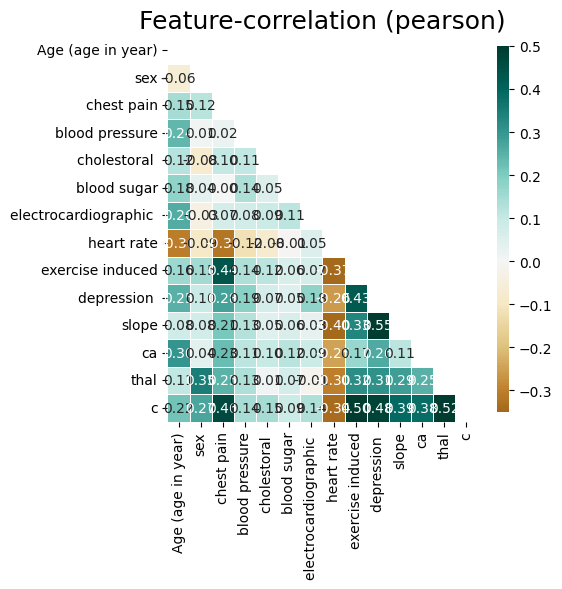

In [230]:
klib.corr_plot(df, annot=True, figsize = (5,5))

<Axes: title={'center': 'Feature-correlation (pearson)'}>

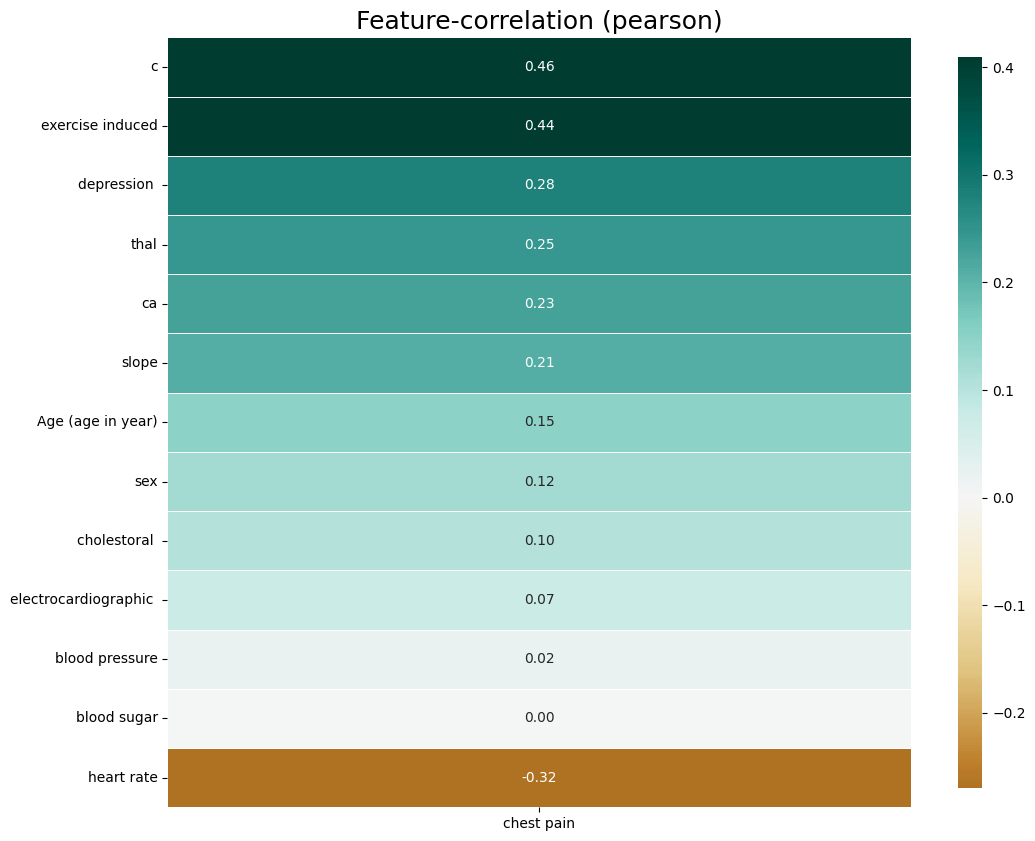

In [232]:
klib.corr_plot(df, target='chest pain')

In [234]:
klib.corr_mat(df)

C:\Users\Ideapad 3\anaconda3\Lib\site-packages\klib\describe.py:275: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
Age (age in year),1.00,-0.06,0.15,0.24,0.12,0.18,0.26,-0.30,0.16,0.25,0.08,0.30,0.11,0.22
sex,-0.06,1.00,0.12,0.01,-0.08,0.04,-0.03,-0.09,0.15,0.10,0.08,0.04,0.35,0.27
chest pain,0.15,0.12,1.00,0.02,0.10,0.00,0.07,-0.32,0.44,0.28,0.21,0.23,0.25,0.46
blood pressure,0.24,0.01,0.02,1.00,0.11,0.14,0.08,-0.12,0.14,0.19,0.13,0.11,0.13,0.14
cholestoral,0.12,-0.08,0.10,0.11,1.00,0.05,0.09,-0.08,0.12,0.07,0.05,0.10,0.01,0.15
blood sugar,0.18,0.04,0.00,0.14,0.05,1.00,0.11,-0.01,0.06,0.05,0.06,0.12,0.07,0.09
electrocardiographic,0.26,-0.03,0.07,0.08,0.09,0.11,1.00,0.05,0.07,0.18,0.03,0.09,-0.01,0.14
heart rate,-0.30,-0.09,-0.32,-0.12,-0.08,-0.01,0.05,1.00,-0.37,-0.26,-0.40,-0.25,-0.30,-0.34
exercise induced,0.16,0.15,0.44,0.14,0.12,0.06,0.07,-0.37,1.00,0.43,0.33,0.17,0.32,0.50
depression,0.25,0.10,0.28,0.19,0.07,0.05,0.18,-0.26,0.43,1.00,0.55,0.26,0.31,0.48


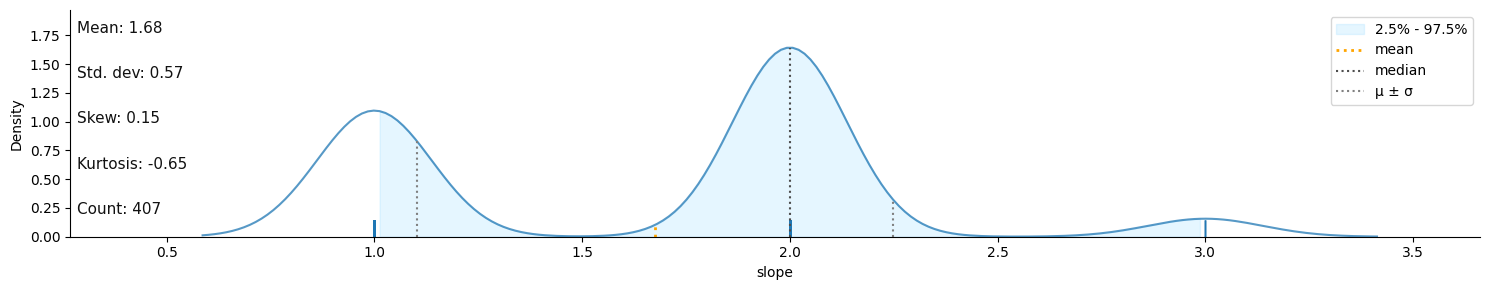

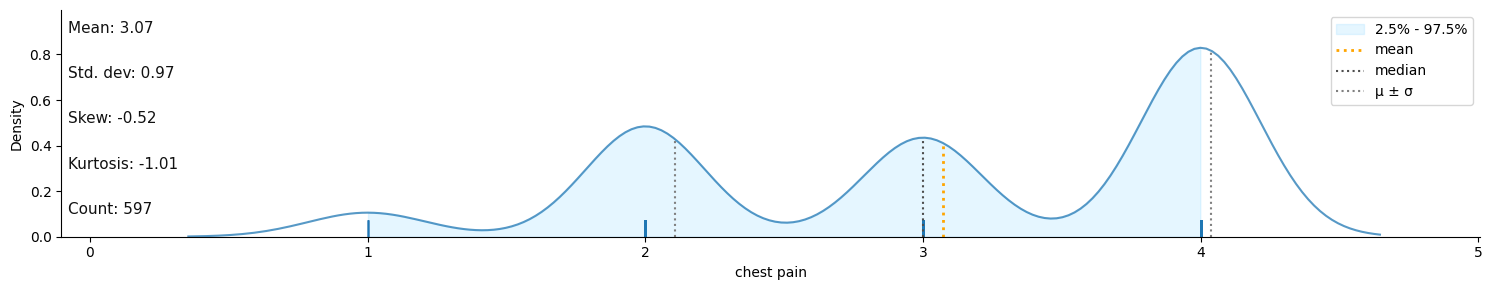

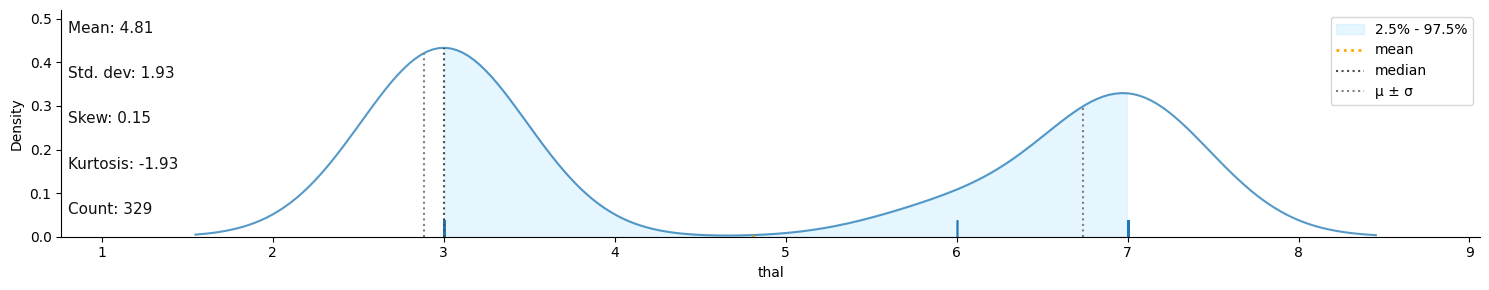

In [236]:
for col in ['slope', 'chest pain', 'thal']:
    klib.dist_plot(df[col])
#klib.dist_plot(df['slope'])
#klib.dist_plot(df['chest pain'])
#klib.dist_plot(df['thal'])

In [238]:
df.isnull().sum()

Age (age in year)          0
sex                        0
chest pain                 0
blood pressure             1
cholestoral               23
blood sugar                8
electrocardiographic       1
heart rate                 1
exercise induced           1
depression                 0
slope                    190
ca                       294
thal                     268
c                          0
dtype: int64

In [240]:
df.columns

Index(['Age (age in year)', 'sex', 'chest pain', 'blood pressure',
       'cholestoral ', 'blood sugar', 'electrocardiographic ', 'heart rate',
       'exercise induced', 'depression ', 'slope', 'ca', 'thal', 'c'],
      dtype='object')

In [242]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns:", numeric_cols)

Numerical columns: Index(['Age (age in year)', 'sex', 'chest pain', 'blood pressure',
       'cholestoral ', 'blood sugar', 'electrocardiographic ', 'heart rate',
       'exercise induced', 'depression ', 'slope', 'ca', 'thal', 'c'],
      dtype='object')


In [244]:
categorical_features = []

for col in df.columns:
    unique_values = df[col].nunique()  # Count unique values
    if unique_values <= 5:  # Usually, categorical data has few unique values
        categorical_features.append(col)

print("Categorical Features:", categorical_features)

Categorical Features: ['sex', 'chest pain', 'blood sugar', 'electrocardiographic ', 'exercise induced', 'slope', 'ca', 'thal', 'c']


In [246]:

# Numeric columns to check for outliers
numeric_cols = ['Age (age in year)', 'blood pressure', 'cholestoral ', 'heart rate', 'depression ', 'ca']

def replace_outliers_with_nan(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Replace outliers with NaN
        df[col] = df[col].apply(lambda x: np.nan if x < lower_bound or x > upper_bound else x)

# Apply the function
replace_outliers_with_nan(df, numeric_cols)

# Check how many NaNs were created
print(df.isnull().sum())

Age (age in year)          0
sex                        0
chest pain                 0
blood pressure            18
cholestoral               42
blood sugar                8
electrocardiographic       1
heart rate                 2
exercise induced           1
depression                11
slope                    190
ca                       315
thal                     268
c                          0
dtype: int64


In [248]:
from sklearn.impute import KNNImputer

# Define numerical columns (excluding output column 'c')
numeric_cols = ['Age (age in year)', 'blood pressure', 'cholestoral ', 'blood sugar', 
                'electrocardiographic ', 'heart rate', 'exercise induced', 'depression ', 
                'slope', 'ca', 'thal']

# Step 1: Check the missing value percentage for each column
missing_percentage = df[numeric_cols].isnull().sum() / len(df)

# Step 2: Fill missing values for columns with less than 10% missing with median
for col in numeric_cols:
    if missing_percentage[col] < 0.10:  # less than 10% missing values
        df[col].fillna(df[col].median(), inplace=True)

# Step 3: Use KNN Imputer for columns with more than 10% missing values
knn_imputer = KNNImputer(n_neighbors=3)
columns_with_missing = [col for col in numeric_cols if missing_percentage[col] >= 0.10]

if columns_with_missing:
    df[columns_with_missing] = knn_imputer.fit_transform(df[columns_with_missing])

# Step 4: Verify if all missing values have been handled
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Age (age in year)        0
sex                      0
chest pain               0
blood pressure           0
cholestoral              0
blood sugar              0
electrocardiographic     0
heart rate               0
exercise induced         0
depression               0
slope                    0
ca                       0
thal                     0
c                        0
dtype: int64


C:\Users\Ideapad 3\AppData\Local\Temp\ipykernel_21876\3921089057.py:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [250]:
# Show the duplicate rows
duplicates = df[df.duplicated()]
print(duplicates)

     Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
265                 49    0           2           110.0         240.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
265          0.0                    0.0       160.0               0.0   

     depression      slope   ca     thal  c  
265          0.0  1.675676  0.5  4.81155  0  


In [252]:
# Show both the first occurrence and duplicates
duplicates_including_first = df[df.duplicated(keep=False)]
print(duplicates_including_first)

     Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
221                 49    0           2           110.0         240.0   
265                 49    0           2           110.0         240.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
221          0.0                    0.0       160.0               0.0   
265          0.0                    0.0       160.0               0.0   

     depression      slope   ca     thal  c  
221          0.0  1.675676  0.5  4.81155  0  
265          0.0  1.675676  0.5  4.81155  0  


In [254]:
# Verify again for duplicates
print("Duplicate rows after removal:", df.duplicated().sum())

Duplicate rows after removal: 1


In [256]:
df = df.drop_duplicates()

# Verify if duplicates were removed
print("Duplicate rows after removal:", df.duplicated().sum())

Duplicate rows after removal: 0


## Finalized preprossesing

In [259]:
out=[]

def iqr_outliers(jj):
    q1 = jj.quantile(0.25)
    q3 = jj.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in jj:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
    
    
iqr_outliers(df['cholestoral '])

Outliers: [365.0, 117.0]


In [261]:
def def_zscore(i):    
   
     L = i.mean() - 3 * i.std()
     U = i.mean() + 3 * i.std()
     outliers=[]
     for c in i:
        if c > U or c < L:
            outliers.append(c)
     print("zscore_Outliers:",outliers)

## Median

The median is the middle value of sorted data.
If the data size is odd, the median is the exact middle value.
If the data size is even, the median is the average of the two middle values

In [264]:
df[['Age (age in year)', 'sex', 'chest pain', 'blood pressure', 'cholestoral ', 'blood sugar', 'electrocardiographic ', 'heart rate', 'exercise induced', 'depression ', 'slope', 'ca', 'thal']].median()

Age (age in year)         52.000000
sex                        1.000000
chest pain                 3.000000
blood pressure           130.000000
cholestoral              240.000000
blood sugar                0.000000
electrocardiographic       0.000000
heart rate               146.000000
exercise induced           0.000000
depression                 0.100000
slope                      1.675676
ca                         0.333333
thal                       4.811550
dtype: float64

# Box plot 
A box plot helps visualize the distribution of a column, showing:
Median (middle line inside the box).
Interquartile Range (IQR) (box edges).
Outliers (dots outside whiskers).

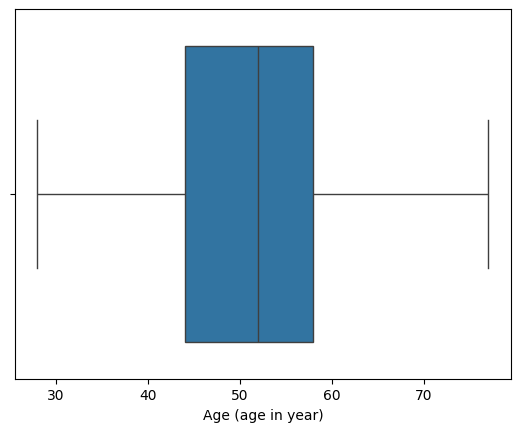

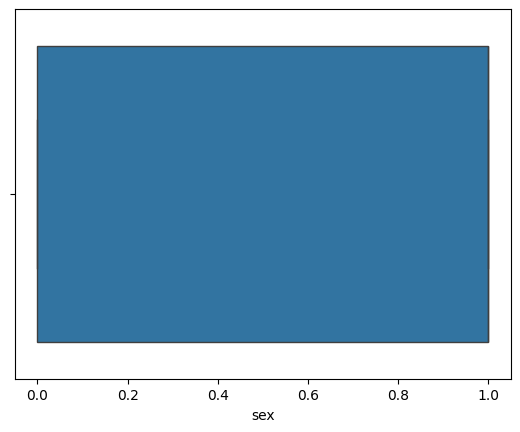

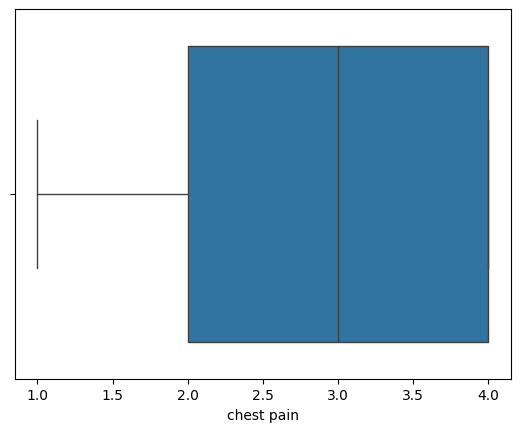

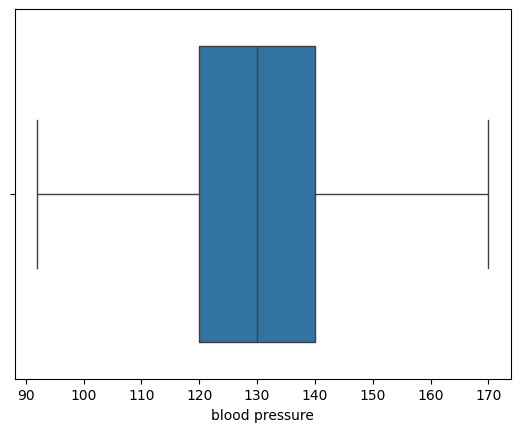

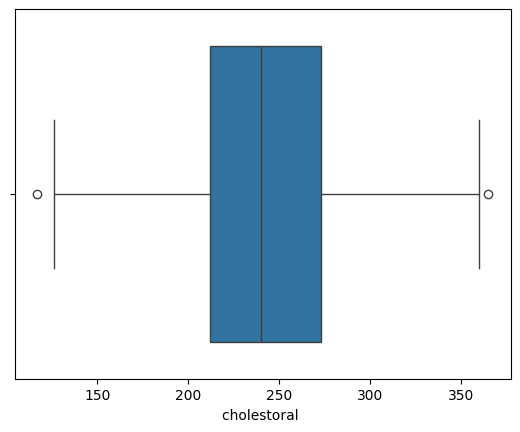

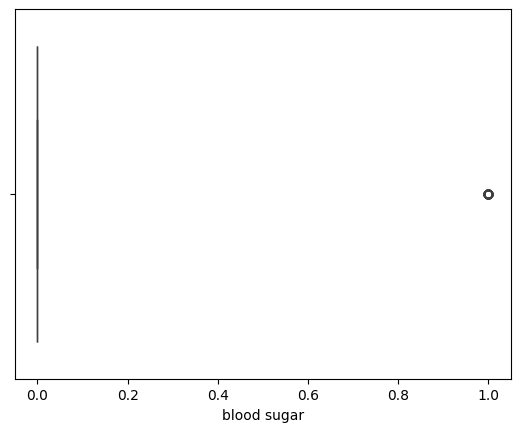

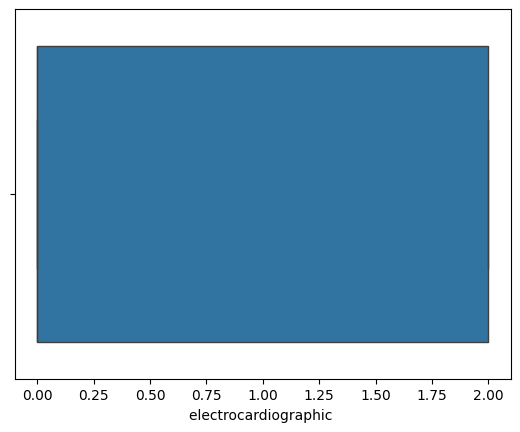

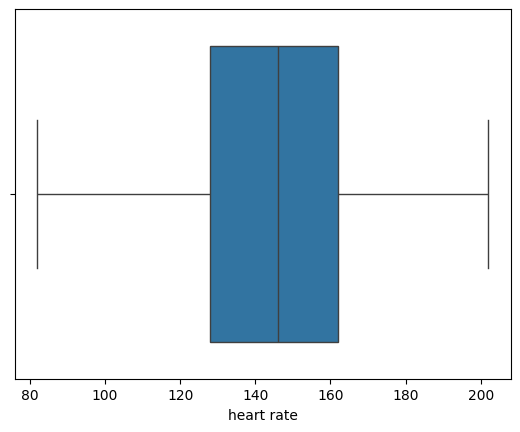

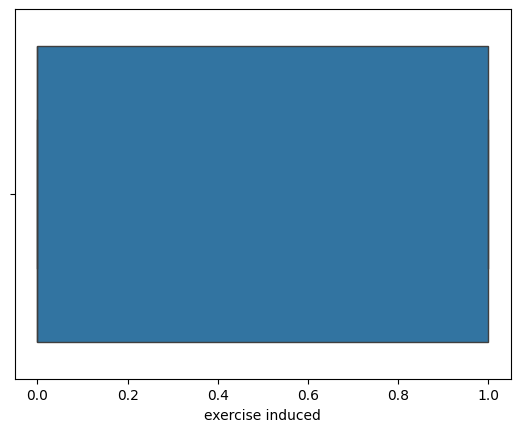

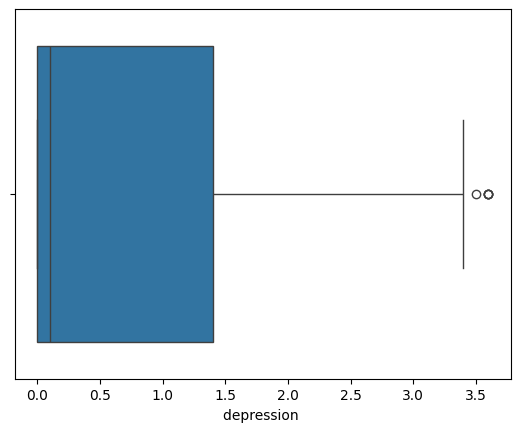

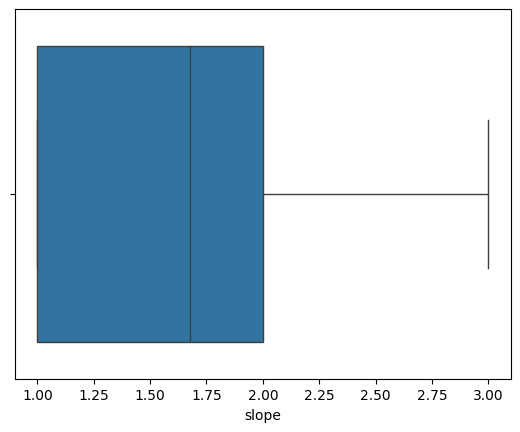

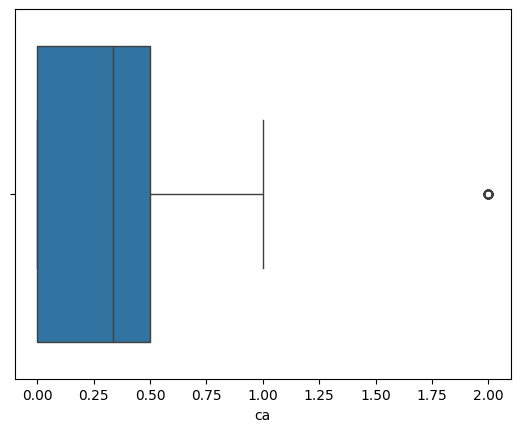

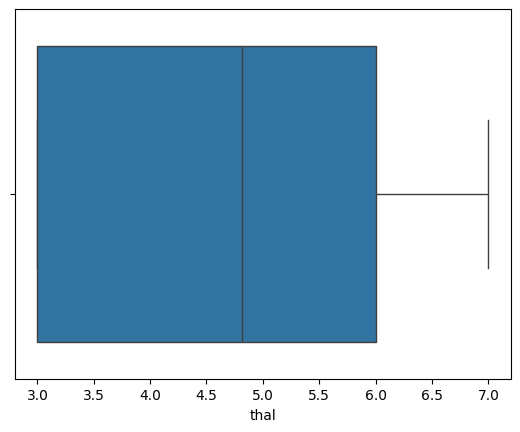

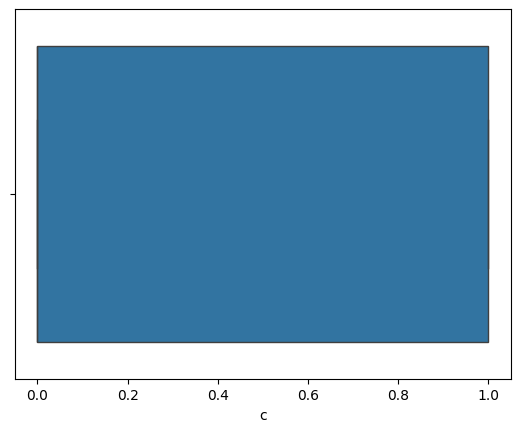

In [267]:
data_feature = df.columns

for i in data_feature:
    p = sns.boxplot(x = df[i])
    plt.show()

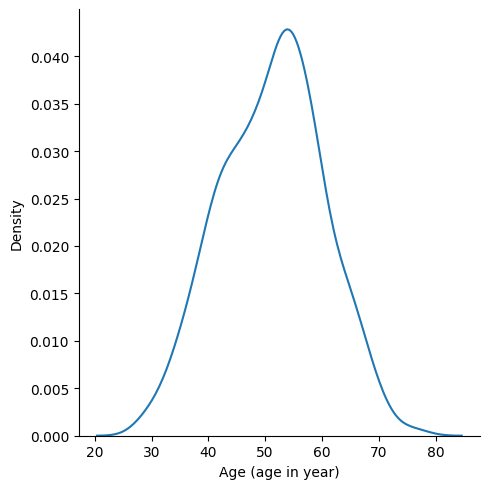

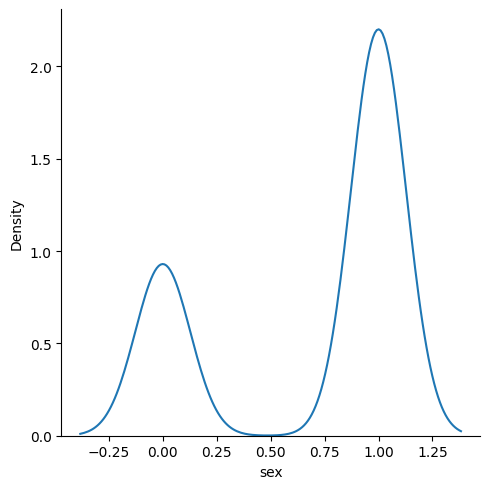

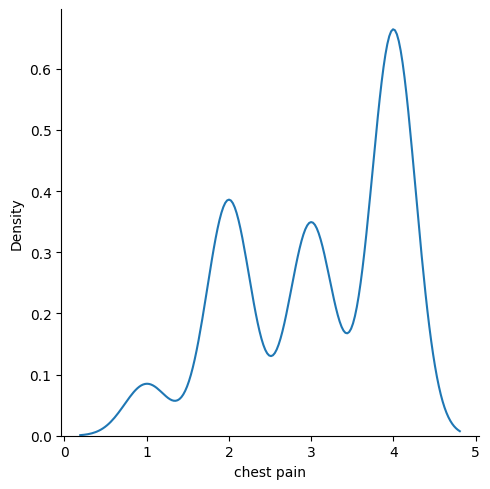

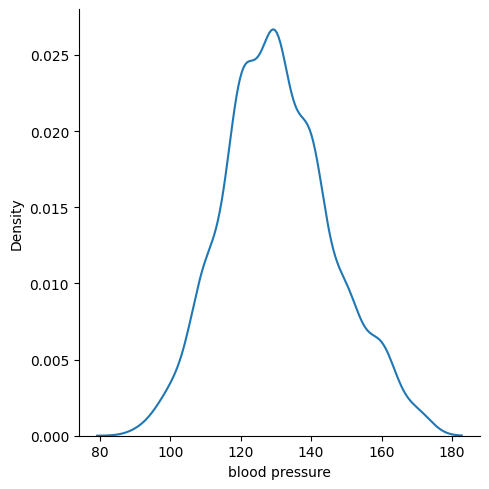

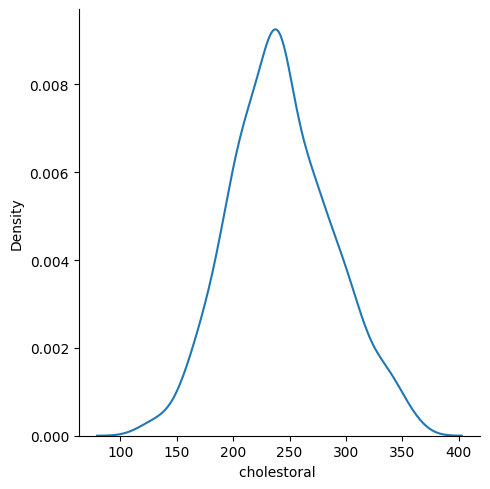

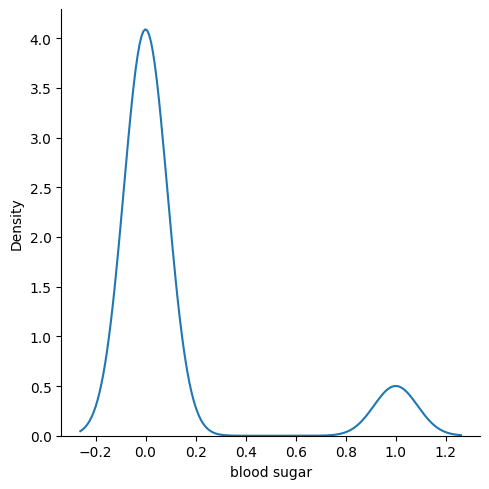

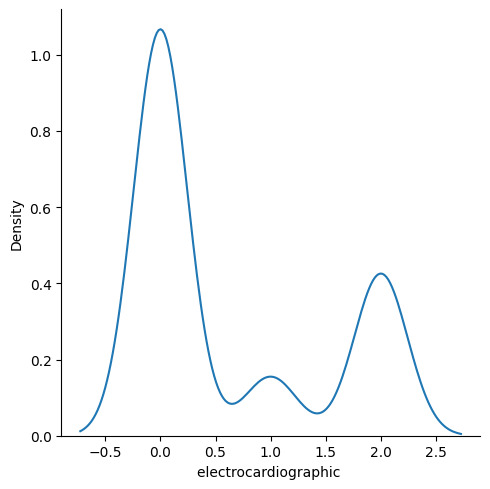

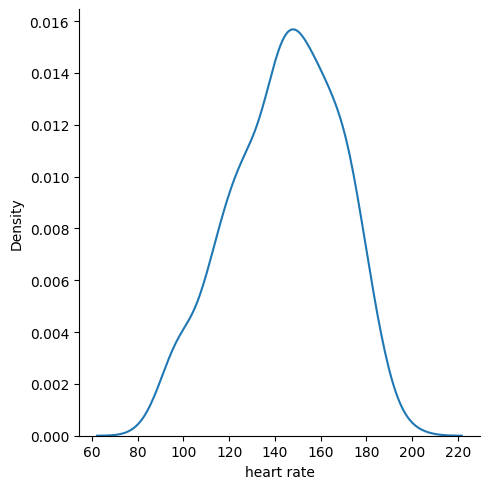

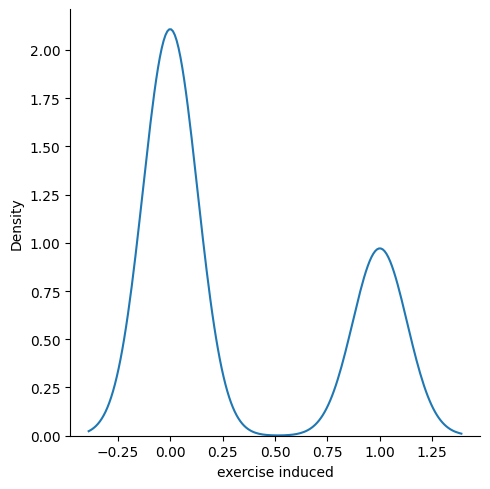

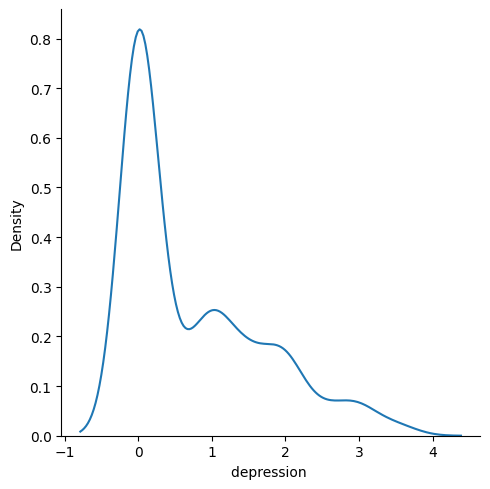

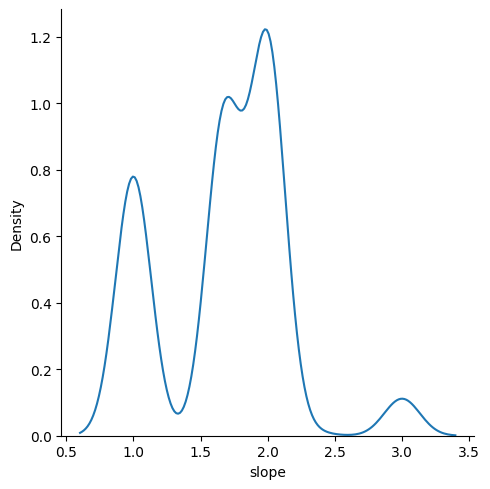

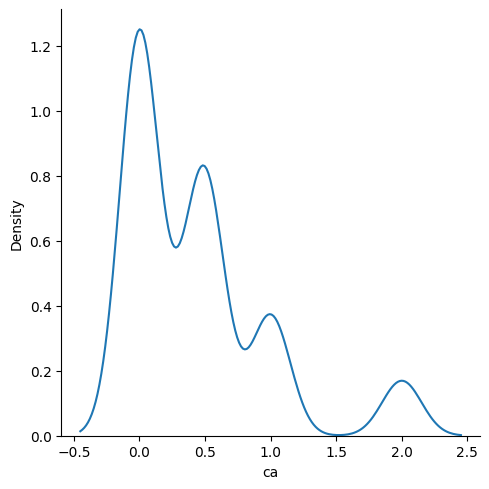

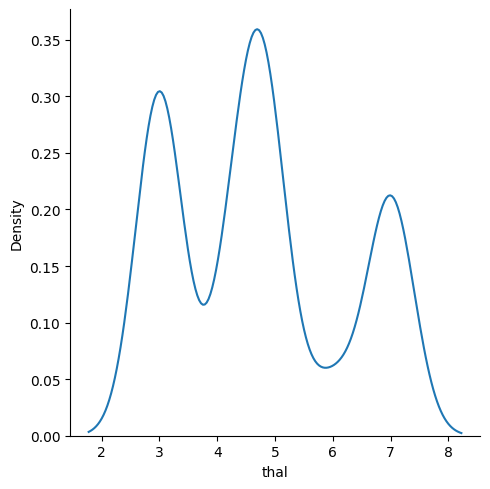

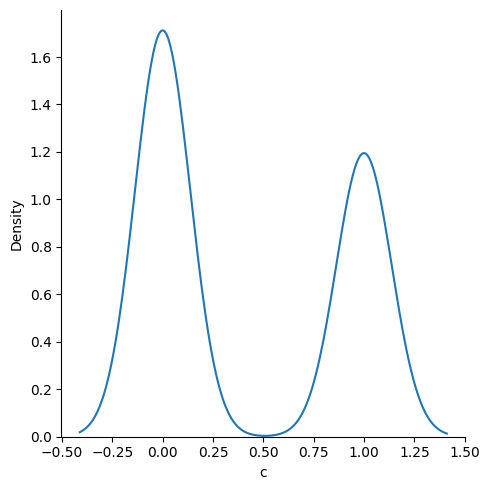

In [268]:
data_feature = df.columns

for i in data_feature:
    if (df[i].dtypes == int) | (df[i].dtypes == float):
        p = sns.displot(x = df[i], kind="kde")
        # plt.show()

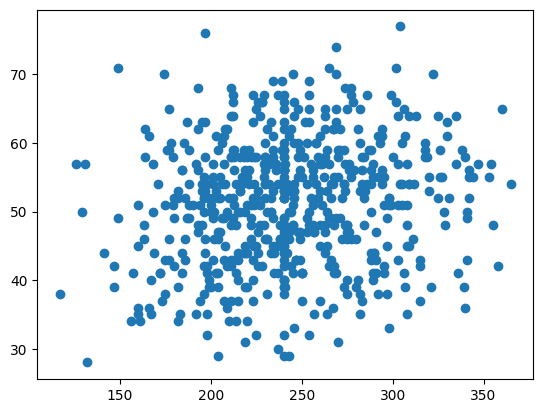

In [271]:
import matplotlib.pyplot as plt
plt.scatter(x=df['cholestoral '], y = df['Age (age in year)'] )
# imagine Dist plot on ur mind - چولگی

In [273]:
from sklearn.impute import KNNImputer
import pandas as pd

In [275]:
# Example DataFrame
# Assuming df is your DataFrame

# Create a KNN Imputer object (with k=3, you can adjust k depending on your data)
knn_imputer = KNNImputer(n_neighbors=3)

# Apply KNN imputation on the dataset
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# If you want to update the original DataFrame with imputed values
df.update(df_imputed)

# Show the imputed data
print(df_imputed)

     Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
0                 63.0  1.0         1.0           145.0         233.0   
1                 37.0  1.0         3.0           130.0         250.0   
2                 41.0  0.0         2.0           130.0         204.0   
3                 56.0  1.0         2.0           120.0         236.0   
4                 57.0  0.0         4.0           120.0         354.0   
..                 ...  ...         ...             ...           ...   
591               52.0  1.0         4.0           140.0         266.0   
592               43.0  1.0         4.0           140.0         288.0   
593               41.0  1.0         4.0           120.0         336.0   
594               44.0  1.0         4.0           135.0         240.0   
595               49.0  1.0         4.0           150.0         222.0   

     blood sugar  electrocardiographic   heart rate  exercise induced  \
0            1.0                    2.0       150.

In [277]:
df.isnull().sum()

Age (age in year)        0
sex                      0
chest pain               0
blood pressure           0
cholestoral              0
blood sugar              0
electrocardiographic     0
heart rate               0
exercise induced         0
depression               0
slope                    0
ca                       0
thal                     0
c                        0
dtype: int64

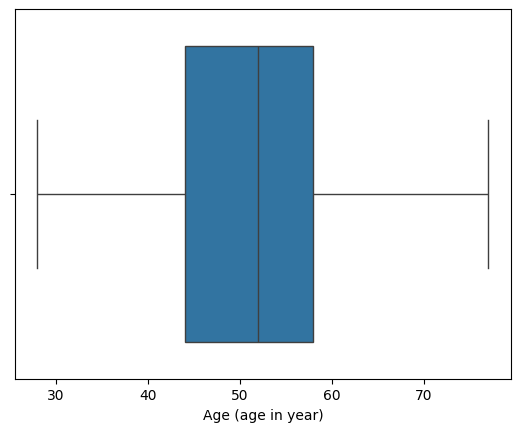

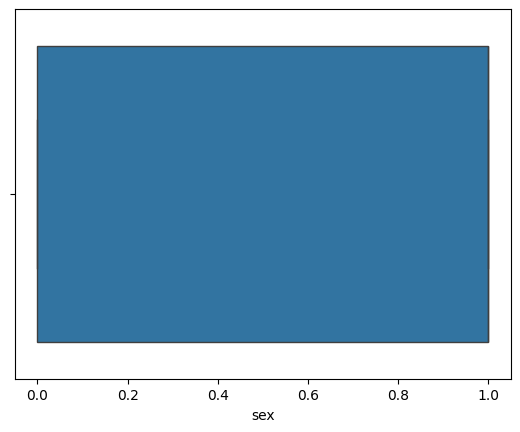

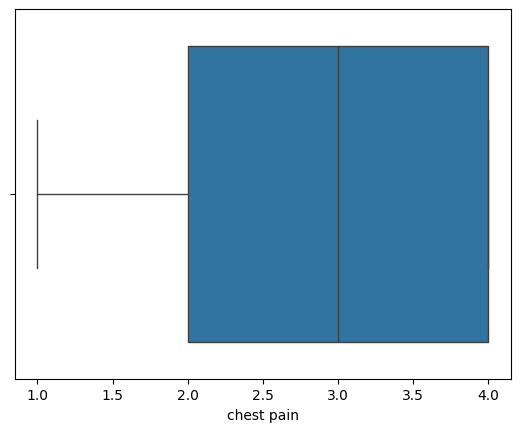

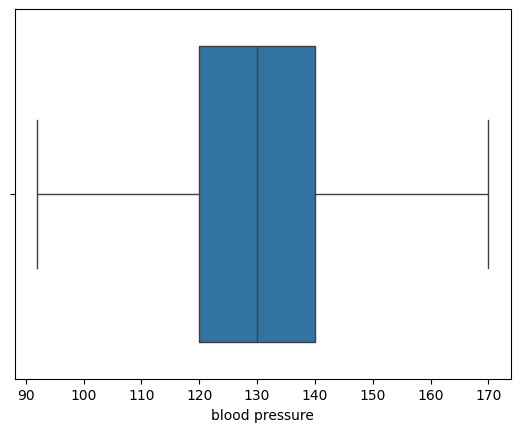

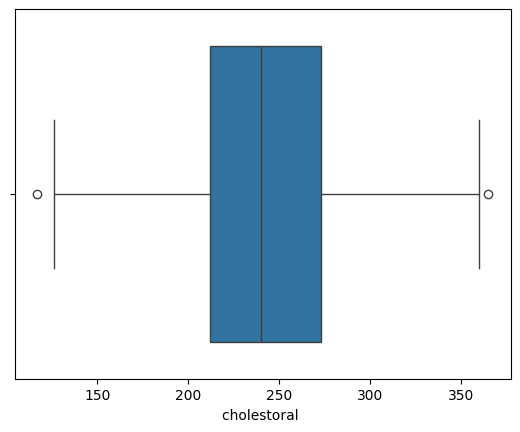

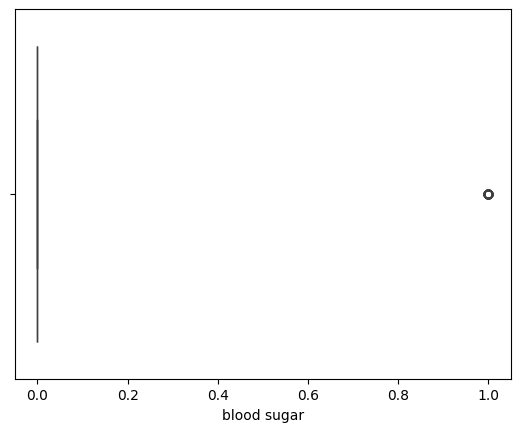

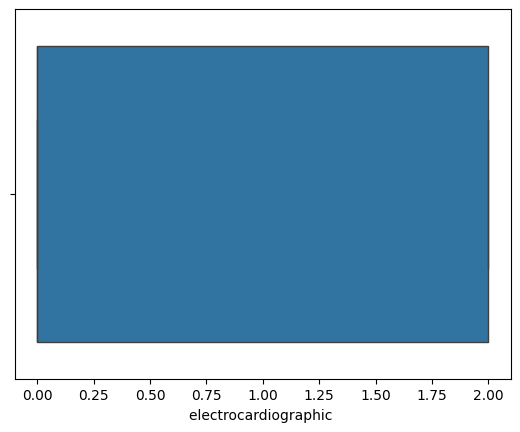

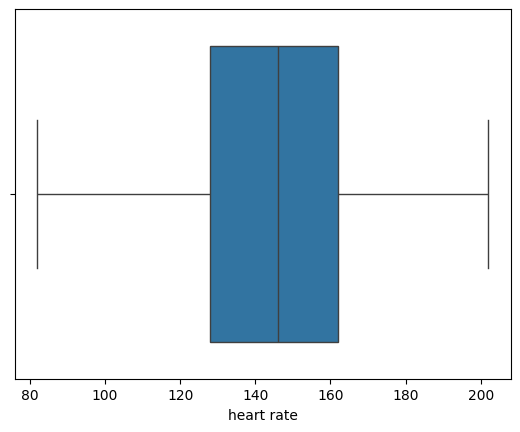

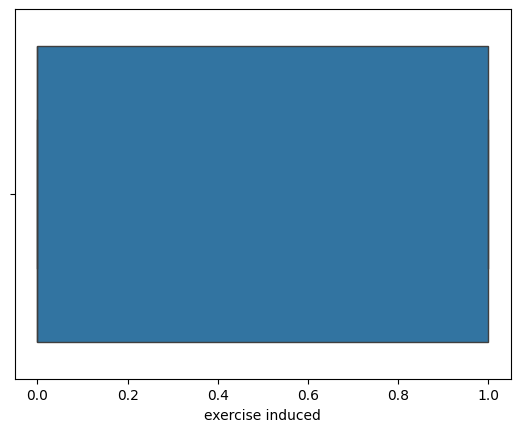

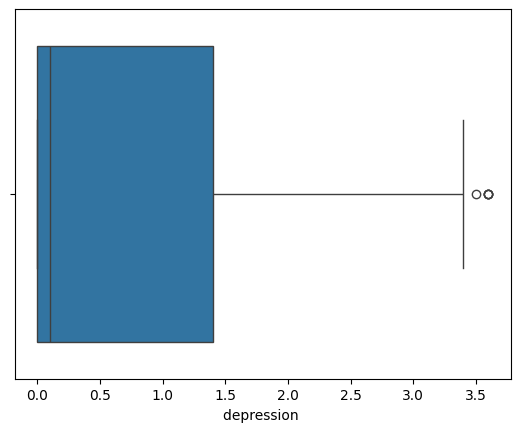

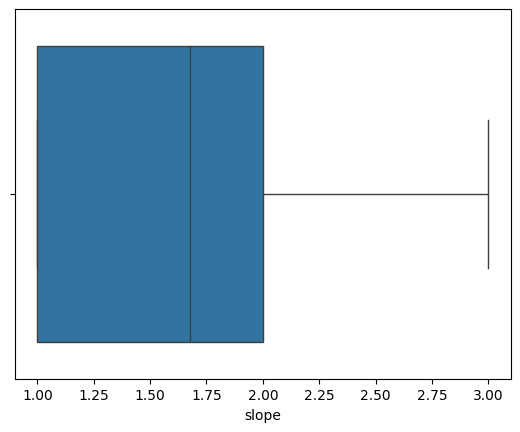

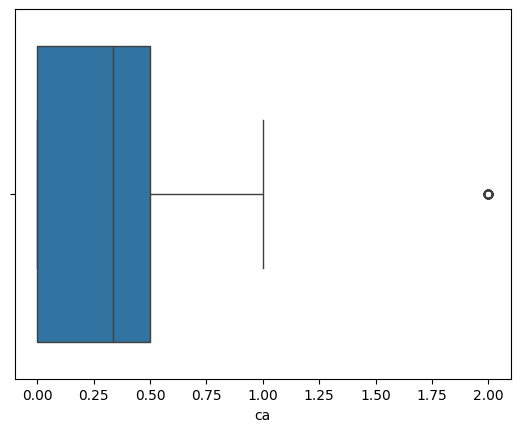

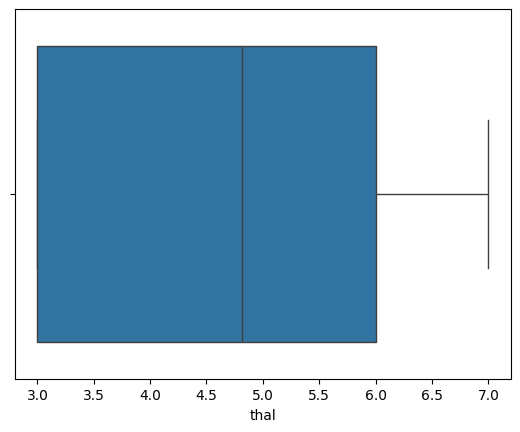

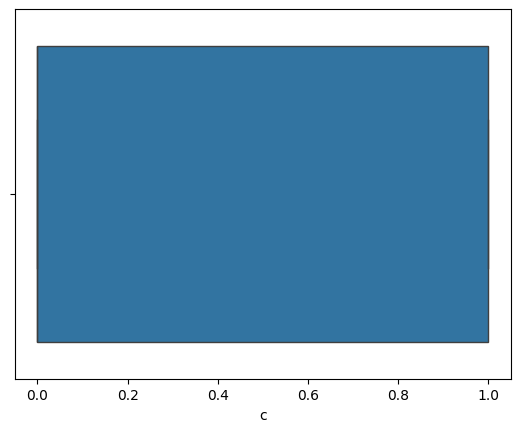

In [279]:
data_feature = df.columns

for i in data_feature:
    p = sns.boxplot(x = df[i])
    plt.show()

In [283]:
df2 = df[df.isnull().sum(axis=1) <=3]

In [285]:
df2.shape

(596, 14)

In [287]:
df2.isnull().sum()

Age (age in year)        0
sex                      0
chest pain               0
blood pressure           0
cholestoral              0
blood sugar              0
electrocardiographic     0
heart rate               0
exercise induced         0
depression               0
slope                    0
ca                       0
thal                     0
c                        0
dtype: int64

In [289]:
df2.loc[:,"cholestoral "]=df2["cholestoral "].fillna(df2["cholestoral "].mean())
df2.loc[:,"heart rate"]=df2["heart rate"].fillna(df2["heart rate"].mean())

In [291]:
df2.loc[:,"blood pressure"]=df2["blood pressure"].fillna(df2["blood pressure"].mean())
df2.loc[:,"depression "]=df2["depression "].fillna(df2["depression "].mode()[0])

In [293]:
df2.loc[:,"blood sugar"]=df2["blood sugar"].fillna(df2["blood sugar"].mode()[0])

In [295]:
df3=df2.copy()

In [297]:
df3.loc[:,"slope"]=df3["slope"].fillna(df2["slope"].mode()[0])
df3.loc[:,"thal"]=df3["thal"].fillna(df2["thal"].mode()[0])
df3.loc[:,"ca"]=df3["ca"].fillna(df2["ca"].mode()[0])

In [299]:
df3.isnull().sum()

Age (age in year)        0
sex                      0
chest pain               0
blood pressure           0
cholestoral              0
blood sugar              0
electrocardiographic     0
heart rate               0
exercise induced         0
depression               0
slope                    0
ca                       0
thal                     0
c                        0
dtype: int64

In [301]:
x=df3.drop("c", axis=1)
y=df3.c

In [303]:
x.shape

(596, 13)

In [305]:
y.shape

(596,)

In [307]:
from sklearn.model_selection import train_test_split

In [309]:
xtrain,xtest,ytrain,ytest=train_test_split( x , y , test_size=0.25,random_state=42)

In [311]:
xtrain.shape

(447, 13)

In [313]:
xtest.shape

(149, 13)

In [315]:
y_train=ytrain

In [317]:
y_test=ytest

In [319]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [321]:
x_train=scaler.fit_transform(xtrain)

In [323]:
x_test=scaler.transform(xtest)

In [325]:
x_test.shape

(149, 13)

In [327]:
x_train.shape

(447, 13)

In [329]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
random=RandomForestClassifier(
        n_estimators= 50,
        max_features="sqrt",
        max_depth=10,
        min_samples_split= 5,
        min_samples_leaf= 4)


random.fit(x_train,y_train)

pred1=random.predict(x_test)

In [333]:
(pred1==y_test).mean()

np.float64(0.8657718120805369)